In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/Users/ilisakalousy/Downloads/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Описание данных

Ссылка на датасет: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

Данный датасет содержит 13 колонок:

- Уникальный номер займа (loan_id)
- Количество иждивенцев заявителя (no_of_dependents)
- Наличие образования (education)
- Статус занятости (self_employed)
- Ежегодный доход, $ (income_annum)
- Размер займа (loan_amount)
- Срок займа, в годах (loan_term)
- Кредитный рейтинг (cibil_score)
- Стоимость активов (residential_assets_value)
- Стоимость коммерческих активов (commercial_assets_value)
- Стоимость luxury активов (luxury_assets_value)
- Стоимость банковских активов (bank_assets_value)
- Статус займа (loan_status) // целевая переменная

# Подготовка и очистка данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Колонки education, self_emoloyed и loan_status представлены категориальными переменными, для работы с ними необходимо перевести их в бинарные:

- education (Graduate - 1, Not graduate - 0)
- self_employed (Yes - 1, No - 0)
- loan_stasus (Approved - 1, Rejected - 0)

In [4]:
new_cols = []

# Убираем пробелы в начале строки
for col in df.columns:  
    col = col.lstrip()
    new_cols.append(col)
    

df.columns = new_cols

df.education = df.education.str.strip()
df.self_employed = df.self_employed.str.strip()
df.loan_status = df.loan_status.str.strip()

replacement_mapping = {
    'education': {'Graduate': 1, 'Not Graduate': 0},
    'self_employed': {'Yes': 1, 'No': 0},
    'loan_status': {'Approved': 1, 'Rejected': 0}
}

# Применение замен согласно словарям
for col, mapping in replacement_mapping.items():
    df[col] = df[col].replace(mapping)

df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


Колонка loan_id, очевидно, не оказывает никакого влияния на целевую переменную, ее следует удалить во избежания мультиколлинеарности.

In [5]:
df = df.drop('loan_id', axis=1)

### Проверим данные на наличие пропусков

In [6]:
df.columns[df.isna().any()].tolist()

[]

Как видно, пропуски в данных отсутствуют.

Проверим наличие мультиколлинеарности

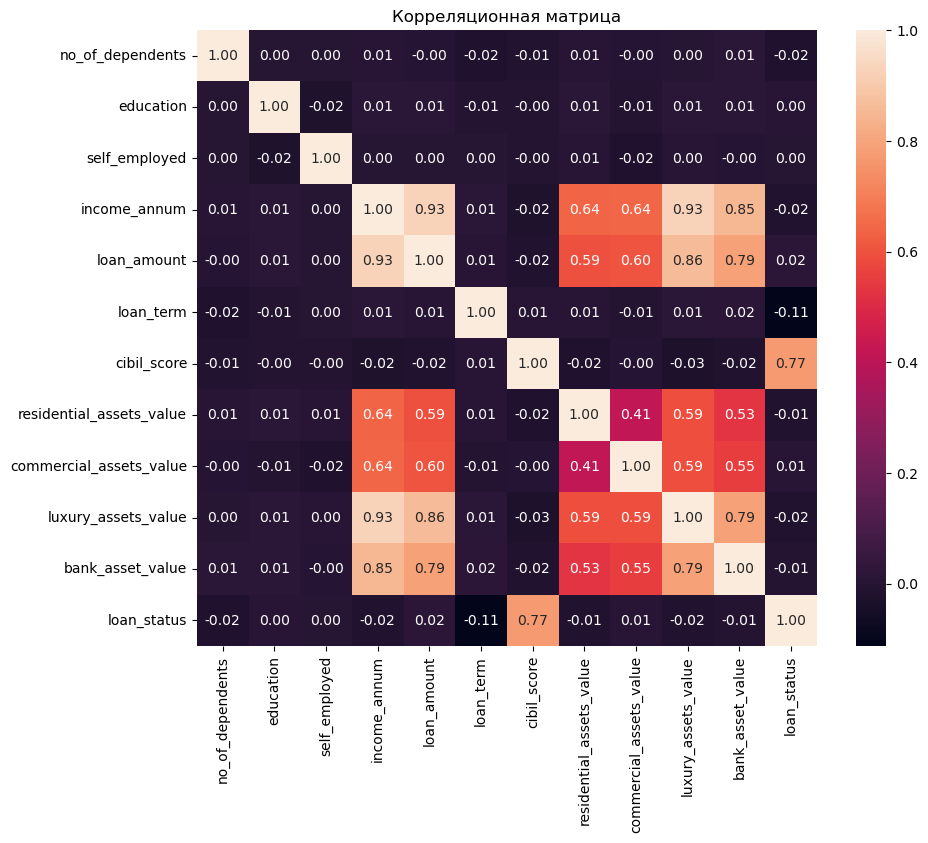

In [8]:
plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

Как видно, некоторые пары признаков имеют очень высокий коэффициент корреляции, удалим их во избежаение мультиколлинеарности.

In [9]:
df = df.drop(['income_annum', 'luxury_assets_value'], axis=1)

# Подготовка к обучению

Для начала выделим обьясняемую и обьясняющие переменные, разделим данные на обучающую и тестовую выборки

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Перед построение модели стандартизируем данные

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Обучение модели

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

print("Accuracy score:", accuracy_score(y_pred, y_test))
print("Precision score:", precision_score(y_pred, y_test))
print("ROC-AUC score:", roc_auc_score(y_pred, y_test))

Accuracy score: 0.9660421545667447
Precision score: 0.9757462686567164
ROC-AUC score: 0.9645227788084931


Далее визуализируем важность каждого признака:

In [13]:
feats = {}

for feature, importance in zip(df.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

importances

,Features,Gini-Importance
0,cibil_score,0.833376
1,loan_term,0.063120
2,loan_amount,0.030222
3,bank_asset_value,0.020417
4,residential_assets_value,0.019722
5,commercial_assets_value,0.018700
6,no_of_dependents,0.008761
7,self_employed,0.003071
8,education,0.002611


Видно, что признак "кредитный рейтинг" имеет слишком высокую важность, относительно остальных признаков. Проверим модель на наличие переобучения:

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MSA for train:' , mean_squared_error(y_train, y_pred_train))
print('MSA for test:' , mean_squared_error(y_test, y_pred))
print('MAE for train:' , mean_absolute_error(y_train, y_pred_train))
print('MAE for test:' , mean_absolute_error(y_test, y_pred))
print('Avg y:', y.mean())

MSA for train: 0.0
MSA for test: 0.03395784543325527
MAE for train: 0.0
MAE for test: 0.03395784543325527
Avg y: 0.622159756383228


Ошибки модели достаточно малы, по данной метрике нельзя точно сказать о наличии переобучения. Проведем кросс-валидацию

In [16]:
from sklearn.model_selection import cross_val_score

clf = cross_val_score(rfc, X, y)
print('Среднее значение', clf.mean())
print('Стандартное отклонение', clf.std())

Среднее значение 0.9714233549588036
Стандартное отклонение 0.003351476836374346


Наша модель производительна на 97,1%, более того имеет достаточно низкие ошибки и стандартное отклонение, близкое к нулю, следовательно, вряд ли имеет место переобучение. В целом, столь высокая важность кредитного рейтинга вполне объяснима, он почти полностью отражает финансовое состояние потенциального заемщика.

# Подбор гиперпараметров

Попробуем оптимизировать нашу модель через подбор гиперпараметров

In [26]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=42)

rs.fit(X_train, y_train)

best_params = rs.best_params_
best_score = rs.best_score_

print("Лучшие параметры:", best_params)
print("Лучший результат:", best_score)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': False}
Лучший результат: 0.9695472292214108


Видим, что точность модели после подбора гиперпараметров через RandomizedSearcb повысилась меньше, чем на 1%, то есть почти не изменилась, попробуем повторить процедуру, но уже используя GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)

gs.fit(X_train, y_train)

best_params = gs.best_params_
best_score = gs.best_score_

print("Лучшие параметры:", best_params)
print("Лучший результат:", best_score)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Лучшие параметры: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Лучший результат: 0.971304698465699


Подбор через GridSearchCV, хоть и незначительно, но только понизил качество модели. Сравним качество трех моделей

# Оценка качества моделей

In [38]:
from sklearn.metrics import recall_score, confusion_matrix

y_pred = rfc.predict(X_test)
y_pred_rs = rfc.predict(X_test)
y_pred_gs = gs.best_estimator_.predict(X_test)

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_rs = pd.DataFrame(confusion_matrix(y_test, y_pred_rs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_gs = pd.DataFrame(confusion_matrix(y_test, y_pred_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix)
display('Recall score for model №1: {}'.format(recall_score(y_test, y_pred)))
display(conf_matrix_rs)
display('Recall score for model №2: {}'.format(recall_score(y_test, y_pred_rs)))
display(conf_matrix_gs)
display('Recall score for model №3: {}'.format(recall_score(y_test, y_pred_gs)))

,predicted 0,predicted 1
actual 0,302,16
actual 1,13,523


'Recall score for model №1: 0.9757462686567164'

,predicted 0,predicted 1
actual 0,302,16
actual 1,13,523


'Recall score for model №2: 0.9757462686567164'

,predicted 0,predicted 1
actual 0,303,15
actual 1,14,522


'Recall score for model №3: 0.9738805970149254'

Оценка качества моделей показала, что исходная модель была наиболее точной в предсказаниях статуса займа.